## Умова


### Хід виконання роботи

Написати програму, яка реалізує алгоритм градієнтного спуску:

1. Розглянути функцію вартості
$$E(w) = \dfrac{1}{2}\sigma^2-r^T_{xd}w+\dfrac{1}{2}w^TR_xw$$
де $\sigma^2$ - константа,</br>
$r_{xd}=(a,b)^T$,
$$R_x=
\begin{bmatrix}
1 & c\\
c & 1
\end{bmatrix}$$
$a$, $b$, $c$ задані за варіантом.
2. Використовуючи метод градiєнтного спуску, обчислити значення $w^{*}(t)$ $t = 1, 2,\ldots, T$ при заданому значеннi параметра швидкостi навчання $\eta$.
3. Побудувати траєкторiю вектору ваг $w(t)$ у тривимiрному просторi i в площинi $W$.
4. Пiдiбрати швидкiсть навчання $\eta_1$, при якiй алгоритм градiєнтного спуску збiгається. Обрати $\eta_2$, за якої алгоритм розходиться. Для обох цих випадкiв побудувати траекторiї ваг.

### Варіант

11. $a = 0.3, b = 0.8, c = 0.4, \eta = 0.2$

Реалізація алгоритму Adam.

## Математичний розв'язок

Стаціонарні точки можна знайти з рівності $\dfrac{\partial E(w)}{\partial w}=0$
$$\dfrac{\partial E(w)}{\partial w} = (\dfrac{1}{2}\sigma^2-r^T_{xd}w+\dfrac{1}{2}w^TR_xw)^{'}_w$$
$$\dfrac{\partial E(w)}{\partial w} = (\dfrac{1}{2}\sigma^2)^{'}_w-(r^T_{xd}w)^{'}_w+(\dfrac{1}{2}w^TR_xw)^{'}_w$$
$$\dfrac{\partial E(w)}{\partial w} = -r_{xd}+R_xw$$
Потрібно знайти розв'язок рівняння $R_xw=r_{xd}$:
$$R_xw=r_{xd}$$
$$R^{-1}_xR_xw=R^{-1}_xr_{xd}$$
$$w^{*}=R^{-1}_xr_{xd}$$
$\det R_x = 1 \times 1 - c \times c = 0.91 > 0$. Отже, $R^{-1}_{xd}$ існує.
$$R^{-1}_{xd}=\dfrac{1}{\det R_{xd}}\begin{bmatrix}
1 & -c\\
-c & 1
\end{bmatrix}$$
Знайшовши невідомі значення:
$$w^{*}=\dfrac{1}{\det R_{xd}}\begin{bmatrix}
1 & -c\\
-c & 1
\end{bmatrix}r_{xd}$$
$$w^{*}=\dfrac{1}{\det R_{xd}}\begin{bmatrix}
a-bc\\
-ac+b
\end{bmatrix}$$
$$w^{*}=\dfrac{1}{0.91}\begin{bmatrix}
-0.02\\
0.68
\end{bmatrix}$$
$$w^{*}=\begin{bmatrix}
-0.022\\
0.75
\end{bmatrix}$$
Перевіримо, чи стаціонарна точка може бути точкою локального мінімуму (перевірка на додатньовизначеність матриці Гессе).
$$\dfrac{\partial^2 E(w)}{\partial w^2} = R_x + R_x^T$$
Матриця $R_x$ є додатньовизначена, бо усі кутові мінори додатні, а тому і $E(w)$ є неперевною на $\mathbb{R}^{n}$, тому $w^{*}$ є точкою локального мінімуму.</br>
Щоб перевірити $w^{*}$ на глобальний мінімум, потрібно знайти власні значення  $\lambda$ матриці $R_x$:
$$\det((R_x + R_x^T)-\lambda I)=0$$
$$\det(2\begin{bmatrix}
1 - \lambda& c\\
c & 1 - \lambda
\end{bmatrix})=0$$
$$(1 - \lambda)^2 - c^2 =0$$
$$(1 - \lambda-c)(1 - \lambda+c) =0$$
$$\lambda_1 = 1-c, \lambda_2 = 1+c$$
Тобто, $\lambda_{min} = 0.6$, $\lambda_{max} = 1.4$. Оскільки $\lambda_{min}>0$ то $w^{*}$ є точкою глобального мінімуму.</br>




## Adam

Adaptive Moment Estimation — це алгоритм для техніки оптимізації градієнтного спуску, який ефективний при роботі з великою кількістю даних або параметрів. Він потребує менше пам'яті та є ефективним. Він є поєднанням алгоритму "градієнтного спуску з імпульсом" і алгоритму "RMSP". Детальніше про алгоритм [тут](https://arxiv.org/pdf/1412.6980).

Покроковий процес:
1. Ініціалізувати:
   - $\eta$ - розмір кроку
   - $\beta_1,\beta2\in[0,1)$ - експоненційні швидкості для моментів
   - $E(w)$ - стохастична функція, яку потрібно мінімізувати
   - $w$ - вектор параметрів
   - $m_0=0$ - 1й момент
   - $v_0=0$ - 2й момент
   - $t=0$ - час
2. Поки не знайдемо оптимальний $w$:
   - $t=t+1$
   - Отримати градієнт для $E$ у точці $w_{t-1}$ :
   $$g_t= \nabla_{w}f_t(w_{t-1})$$
   - Оновити моменти:
     $$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$$
     $$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$$
   - Виконати корекцію зміщення:
     $$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$
   - Оновити параметри:
     $$w_{t+1} = w_t - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$

Значення гіперпараметрів за замовчуванням:
- $ \eta = 0.001 $
- $ \beta_1 = 0.9 $
- $ \beta_2 = 0.999 $
- $ \epsilon = 10^{-7} $

## Програмна реалізація

### Імпорт потрібних бібліотек та функцій

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задана функція

Інтерпретуємо задані значення в код.

In [2]:
a = 0.3
b = 0.8
c = 0.4
eta = 0.2

sigma2 = 0.5

r = np.array([a, b])
R = np.array([
    [1, c],
    [c, 1]
])

def E(w, sigma2=sigma2, r=r, R=R):
    return 1/2 * sigma2 - r.T.dot(w) + 1/2 * w.T.dot(R).dot(w)

### Додаткові утиліти
- `gradient` для пошуку градієнту функції `E` в точці `w`
- `derivative` для пошуку похідної функції `E` по `w[i]`

In [3]:
def gradient(E, w):
    gradient = np.array([
        derivative(E, w, i) for i in range(len(w))
    ])

    # gradient = -r + w.dot(R)
    return gradient

def derivative(E, w, i):

    h = 1e-5

    w_left = np.copy(w)
    w_right = np.copy(w)

    w_left[i] += h
    w_right[i] -= h

    return ((E(w_left) - E(w_right)) / (2 * h))

### Реалізований алгоритм Adam.

In [4]:
def customAdam(
        E,
        w_start,
        eta=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
        verbose=0
    ):

    m = 0
    v = 0
    t = 0
    max_iter = 500

    params = np.zeros(
        (max_iter+1, len(w_start))
    )

    params[0] = w_start

    while np.linalg.norm(gradient(E, params[t])) > epsilon and t < max_iter:
        t += 1

        grad = gradient(E, params[t-1])

        m = beta_1 * m + (1 - beta_1) * grad
        v = beta_2 * v + (1 - beta_2) * grad ** 2

        corrected_m = m / (1 - beta_1 ** t)
        corrected_v = v / (1 - beta_2 ** t)

        params[t] = params[t-1] - eta * corrected_m / (np.sqrt(corrected_v) + epsilon)

        if verbose >= 2:
            print(f"iter: {t}")
            print(
                "||nabla E(w({t}))||:",
                np.linalg.norm(gradient(E, params[t])).round(3)
            )
            print(f"w({t}): {params[t]}")
            print(f"E(w({t})): {E(params[t]):.3f}")
            print()

    if verbose >= 1:
        print(f"Number of coverage: {t+1}")
        print(f"w*: {params[t]}")
    return params[:t+1]

Варто зазначити, що алгоритм збіжний за умови, що $0 < \eta < 2/\lambda_{max} = 1.44$. Швидкість алгоритму не досить висока буде, оскільки $\lambda_{min}/\lambda_{max}=0.43$ менше за 1.

### Відображення траєкторії ваг

Функція `plot` для відображення траєкторії ваг.

In [5]:
def plot(E, w):

    w_min = np.min(w)-1
    w_max = np.max(w)+1
    x = np.arange(w_min, w_max, w_max*0.1)
    y = np.arange(w_min, w_max, w_max*0.1)
    X, Y = np.meshgrid(x, y)

    Z = np.array(
        [
            [E(np.array([a, b])) for a, b in zip(x_row, y_row)]
            for x_row, y_row in zip(X, Y)
        ]
    )

    fig = plt.figure(figsize=(15, 15))

    ax = fig.add_subplot(221, projection="3d")
    ax.plot_surface(X, Y, Z, color="green", alpha=0.2)
    ax.set(xlabel="$w_1$", ylabel="$w_2$", zlabel="$E(w)$")
    ax.set_title("3D")

    trajectory_z = [E(w_i) for w_i in w]

    ax.plot(
        w[:, 0],
        w[:, 1],
        trajectory_z,
        marker="o",
        color="red",
        linewidth=1,
        label="Траєкторія $E$"
    )
    ax.scatter(w[0, 0], w[0, 1], trajectory_z[0], color="green", s=100, marker="s", label="Початок траєкторії $E$")
    ax.scatter(w[-1, 0], w[-1, 1], trajectory_z[-1], color="blue", s=100, marker="X", label="Кінець траєкторії $E$")  # End
    ax.legend()

    ax = fig.add_subplot(222)
    contour = ax.contour(X, Y, Z, levels=20, cmap="plasma")
    ax.clabel(contour, inline=True, fontsize=8)
    ax.set(xlabel="$w_1$", ylabel="$w_2$")
    ax.set_title("2D")

    ax.plot(
        w[:, 0],
        w[:, 1],
        c="red",
        marker="o",
        linewidth=1,
        label="Траєкторія ваг",
        zorder=1
    )

    # Додаємо початкову і кінцеву точки поверх лінії
    ax.scatter(w[0, 0], w[0, 1], color="green", s=100, marker="s", label="Початок траєкторії ваг")
    ax.scatter(w[-1, 0], w[-1, 1], color="blue", s=100, marker="X", label="Кінець траєкторії ваг")

    ax.legend()


    plt.tight_layout()
    plt.show()


## Робота Adam для різних  $\eta$ та відображення траєкторій ваг

Number of coverage: 169
w*: [-0.02377458  0.809489  ]


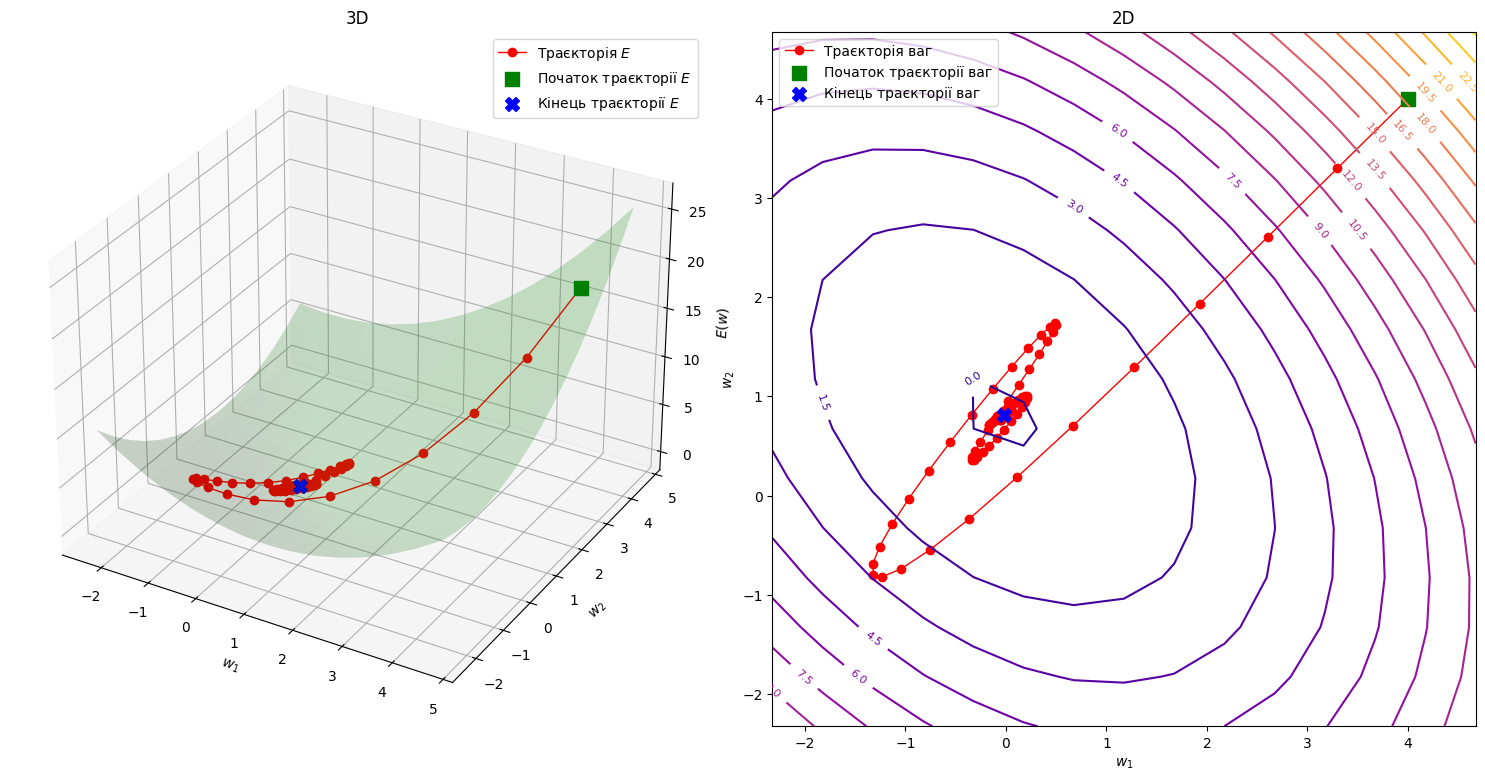

In [6]:
w_1 = customAdam(
    E=E,
    w_start=np.array([4,4]),
    eta=0.7,
    epsilon=1e-4,
    verbose=1
)

plot(E, w_1)

Number of coverage: 166
w*: [-0.02373282  0.80941399]


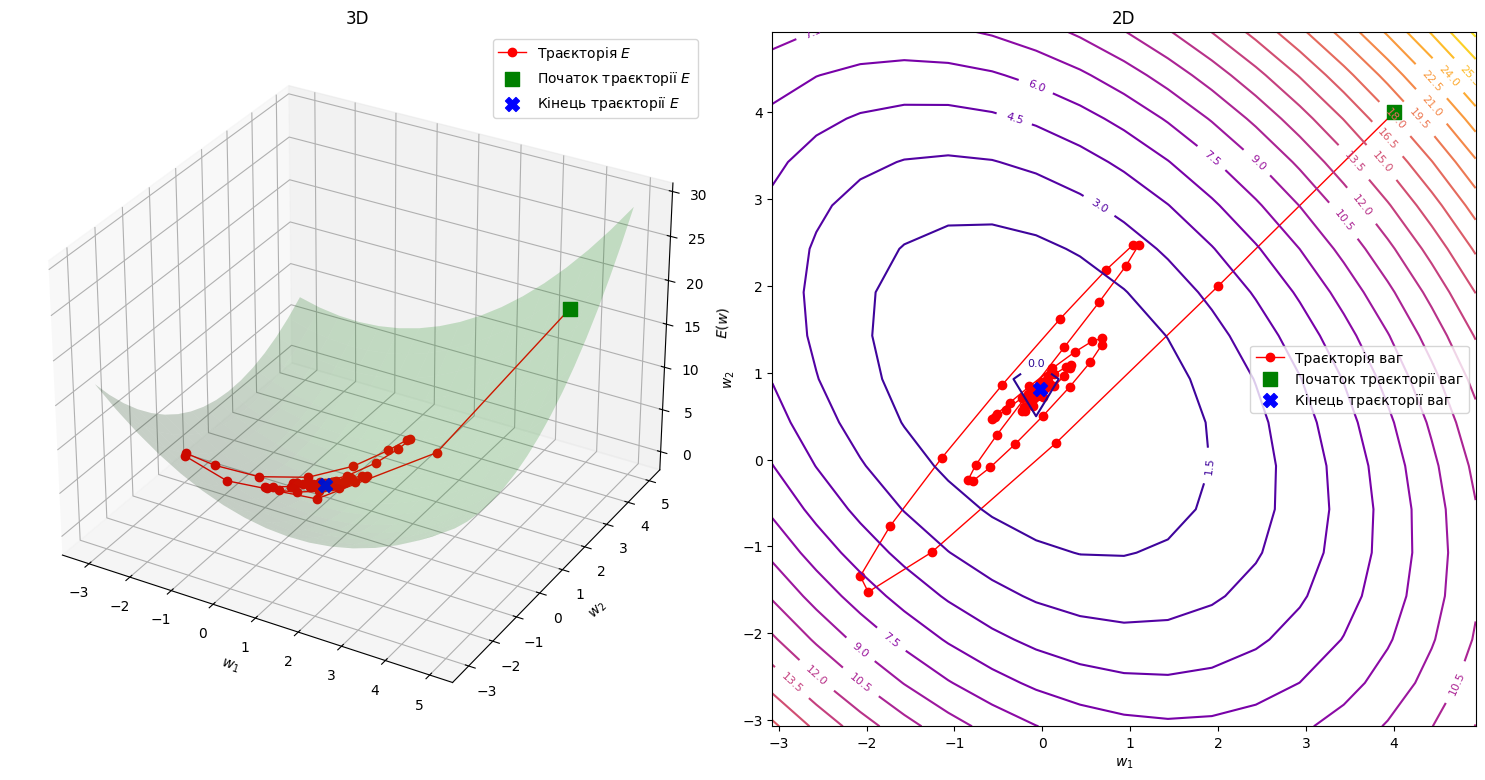

In [7]:
w_2 = customAdam(
    E=E,
    w_start=np.array([4,4]),
    eta=2,
    epsilon=1e-4,
    verbose=1
)

plot(E, w_2)

## Висновки

Алгоритм Adam досить швидко шукає точку мінімуму, проте, через неправильно задані $\eta$ чи умови зупинки, може працювати дещо більше часу, ніж треба.